# Setup and Context

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

<img src=https://i.imgur.com/lSyNUwR.png width=700>

Today you will become Dr Semmelweis. This is your office 👆. You will step into Dr Semmelweis' shoes and analyse the same data collected from 1841 to 1849.

### The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

<img src=https://i.imgur.com/6HfLtaC.png width=500>

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
# %pip install --upgrade plotly

### Import Statements

In [108]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as stats

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [4]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv', 
                      parse_dates=['date'])

# Preliminary Data Exploration

Check out these two DataFrames ☝️. 
* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [5]:
df_yearly.head()

year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1

In [6]:
df_monthly.head()

date  births  deaths
0 1841-01-01     254      37
1 1841-02-01     239      18
2 1841-03-01     277      12
3 1841-04-01     255       4
4 1841-05-01     255       2

In [7]:
print(f"There are {df_yearly.shape} (rows,columns) in the yearly data")

There are (12, 4) (rows,columns) in the yearly data


In [8]:
print(f"There are {df_monthly.shape} (rows,columns) in the monthly data")

There are (98, 3) (rows,columns) in the monthly data


In [9]:
print(f"We have the following years for data {df_yearly.year.unique()}")

We have the following years for data [1841 1842 1843 1844 1845 1846]


### Check for Nan Values and Duplicates

In [10]:
print("Let us check if we have any NaN or duplicated data")

Let us check if we have any NaN or duplicated data


In [11]:
df_yearly.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool

In [12]:
df_yearly.isna()

year  births  deaths  clinic
0   False   False   False   False
1   False   False   False   False
2   False   False   False   False
3   False   False   False   False
4   False   False   False   False
5   False   False   False   False
6   False   False   False   False
7   False   False   False   False
8   False   False   False   False
9   False   False   False   False
10  False   False   False   False
11  False   False   False   False

In [13]:
print("Ok so for the df_yearly we have no duplicates or NaN values")

Ok so for the df_yearly we have no duplicates or NaN values


In [14]:
df_monthly.duplicated().any() 

False

In [15]:
df_monthly.isnull().any()

date      False
births    False
deaths    False
dtype: bool

In [16]:
print("Both datasets have neither NaN/Null values")

Both datasets have neither NaN/Null values


In [17]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [18]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


### Descriptive Statistics

In [19]:
df_yearly.describe()

year   births  deaths
count    12.00    12.00   12.00
mean  1,843.50 3,152.75  223.33
std       1.78   449.08  145.38
min   1,841.00 2,442.00   66.00
25%   1,842.00 2,901.75  100.25
50%   1,843.50 3,108.50  219.50
75%   1,845.00 3,338.25  263.50
max   1,846.00 4,010.00  518.00

In [20]:
df_monthly.describe()

births  deaths
count   98.00   98.00
mean   267.00   22.47
std     41.77   18.14
min    190.00    0.00
25%    242.50    8.00
50%    264.00   16.50
75%    292.75   36.75
max    406.00   75.00

### Percentage of Women Dying in Childbirth

How dangerous was childbirth in the 1840s in Vienna? 

* Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [21]:
df_yearly

year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2

In [22]:
print("We can find the yearly death rate of women post delivery: ")
100 - ((df_yearly.births - df_yearly.deaths)/df_yearly.births * 100)

We can find the yearly death rate of women post delivery: 


0     7.81
1    15.76
2     8.95
3     8.24
4     6.90
5    11.45
6     3.52
7     7.60
8     5.99
9     2.30
10    2.04
11    2.80
dtype: float64

In [23]:
death_probabilty = 100 - ((df_yearly.births.sum() - df_yearly.deaths.sum())/df_yearly.births.sum() * 100)
print(f"The probabilty of a woman dying post delivery was: {death_probabilty:.3}%")

The probabilty of a woman dying post delivery was: 7.08%


# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

In [24]:
df_yearly.births.min()

2442

In [25]:
df_yearly.births.max()

4010

In [26]:
df_yearly.year.unique()

array([1841, 1842, 1843, 1844, 1845, 1846], dtype=int64)

In [27]:
df_yearly.head(1)

year  births  deaths    clinic
0  1841    3036     237  clinic 1

In [28]:
df_yearly.year =  pd.to_datetime(df_yearly.year, format='%Y')

In [29]:
df_yearly.dtypes

year      datetime64[ns]
births             int64
deaths             int64
clinic            object
dtype: object

In [30]:
df_yearly.head(1)

year  births  deaths    clinic
0 1841-01-01    3036     237  clinic 1

In [31]:
df_yearly.year

0    1841-01-01
1    1842-01-01
2    1843-01-01
3    1844-01-01
4    1845-01-01
5    1846-01-01
6    1841-01-01
7    1842-01-01
8    1843-01-01
9    1844-01-01
10   1845-01-01
11   1846-01-01
Name: year, dtype: datetime64[ns]

In [32]:
dat = df_yearly.year.unique

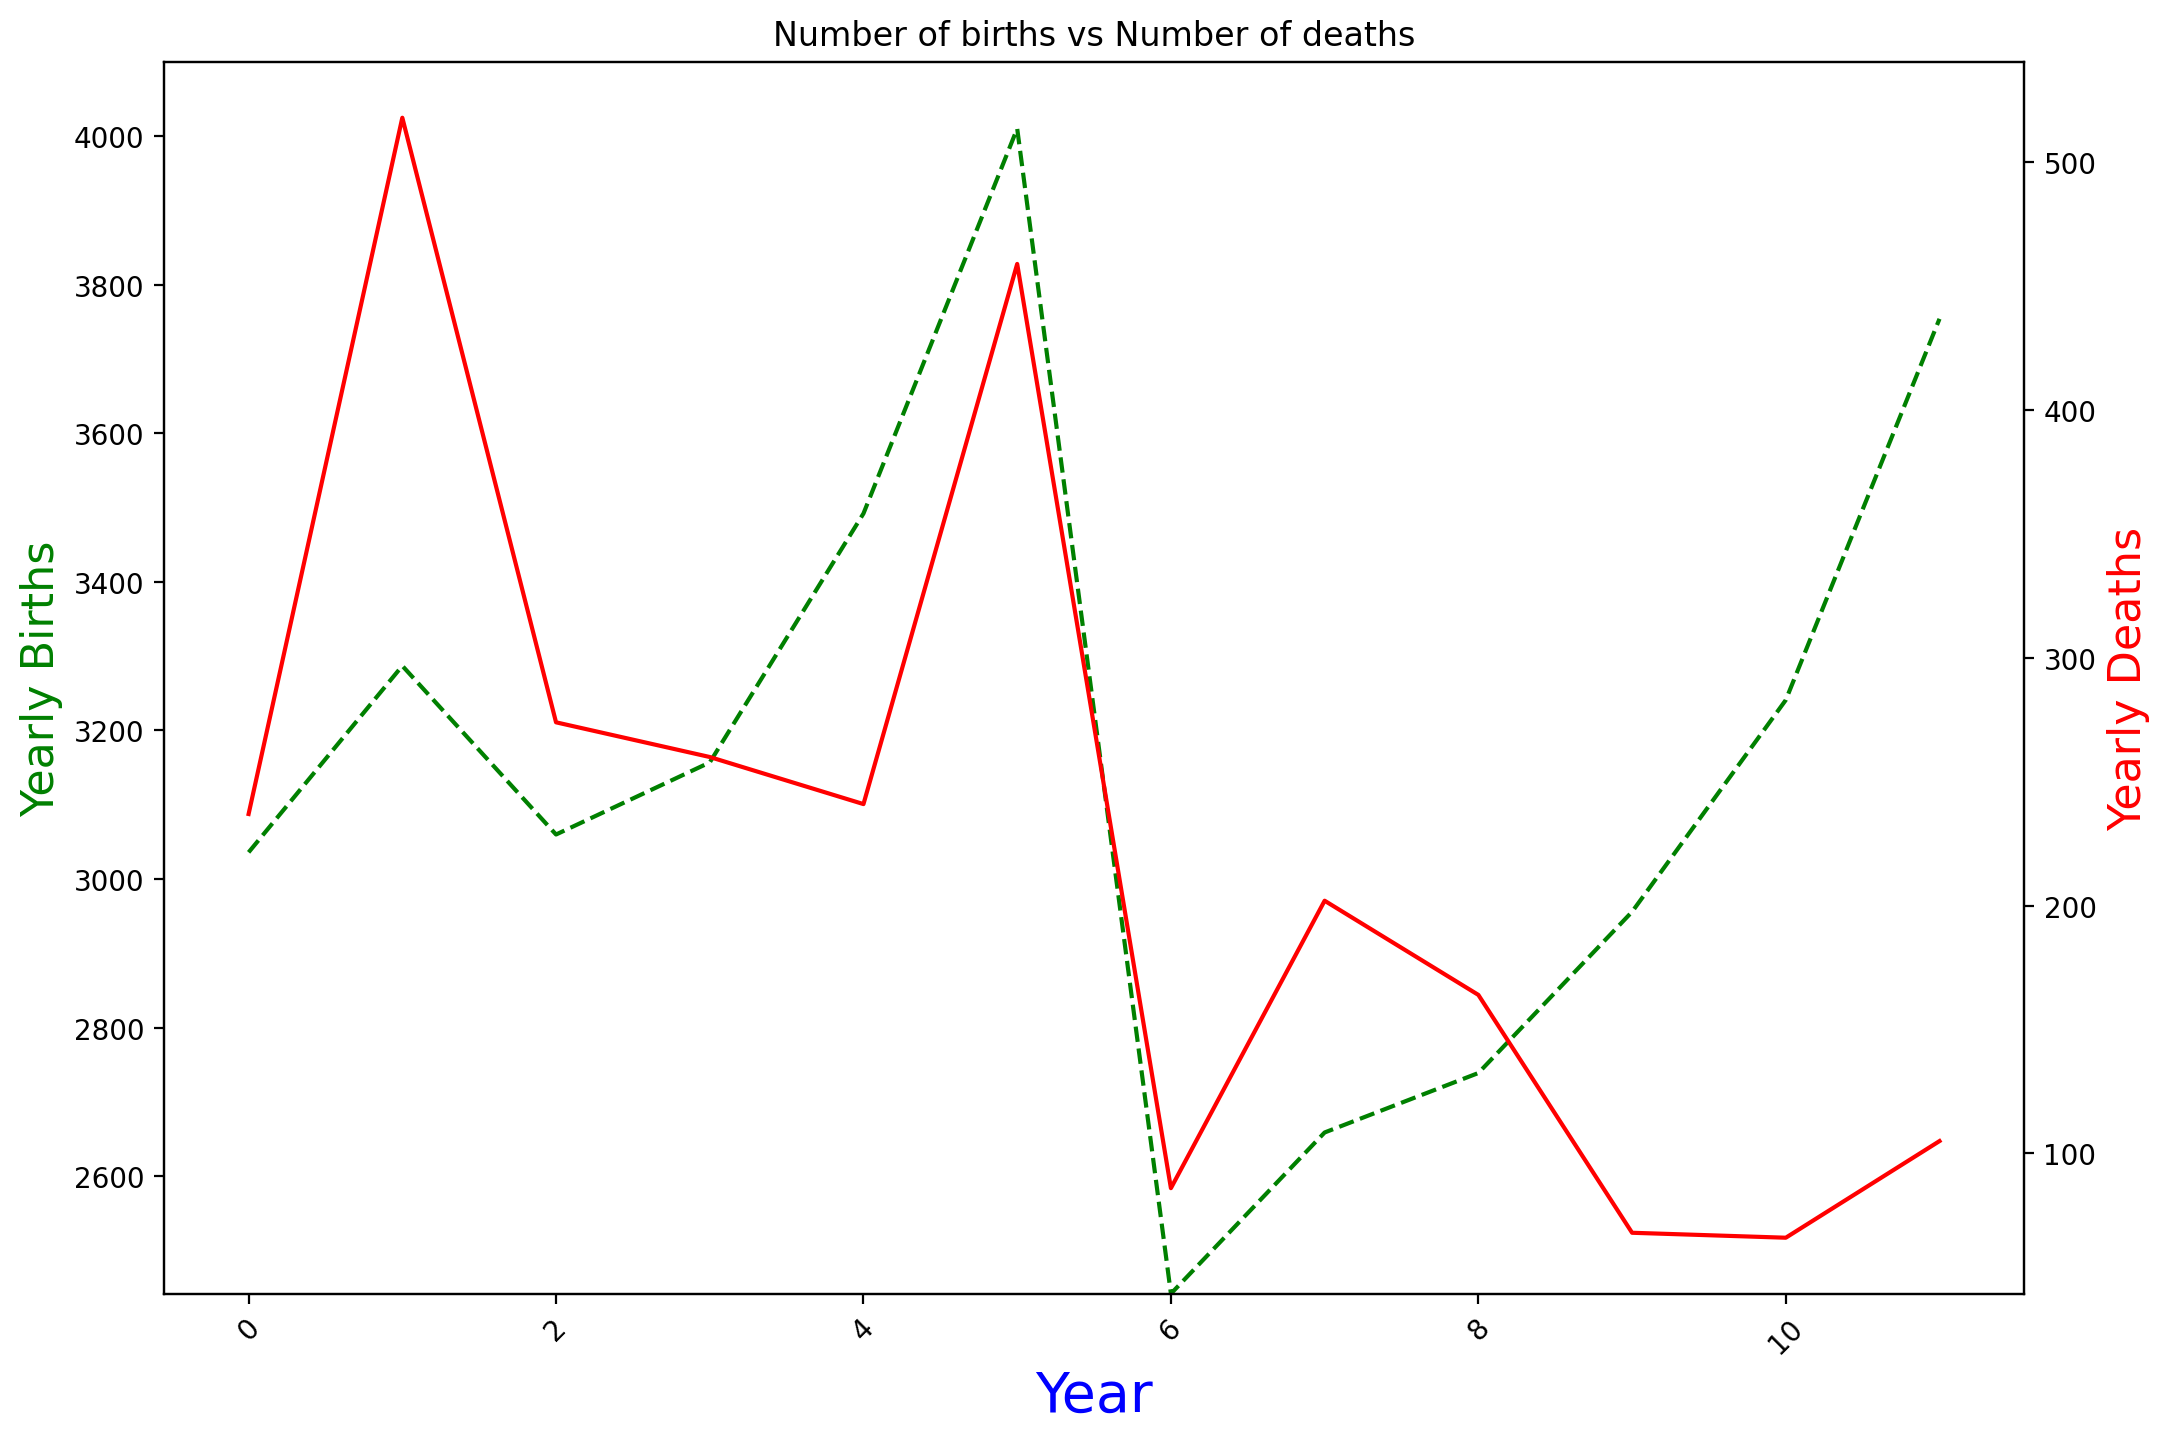

In [33]:
plt.figure(figsize=(12,8), dpi=200)
plt.title("Number of births vs Number of deaths")
plt.yticks(fontsize=10)

plt.xticks(fontsize=10,
          rotation=45)

plt.ylim(2442,4100)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_yearly.births, color='green', linestyle='dashed')

ax2.plot(df_yearly.deaths, color='red')


ax1.set_ylabel("Yearly Births", color='green', fontsize=16)
ax2.set_ylabel("Yearly Deaths", color='red', fontsize=16)

ax1.set_xlabel("Year", color='blue', fontsize=20)

plt.xlabel("years")
plt.show()

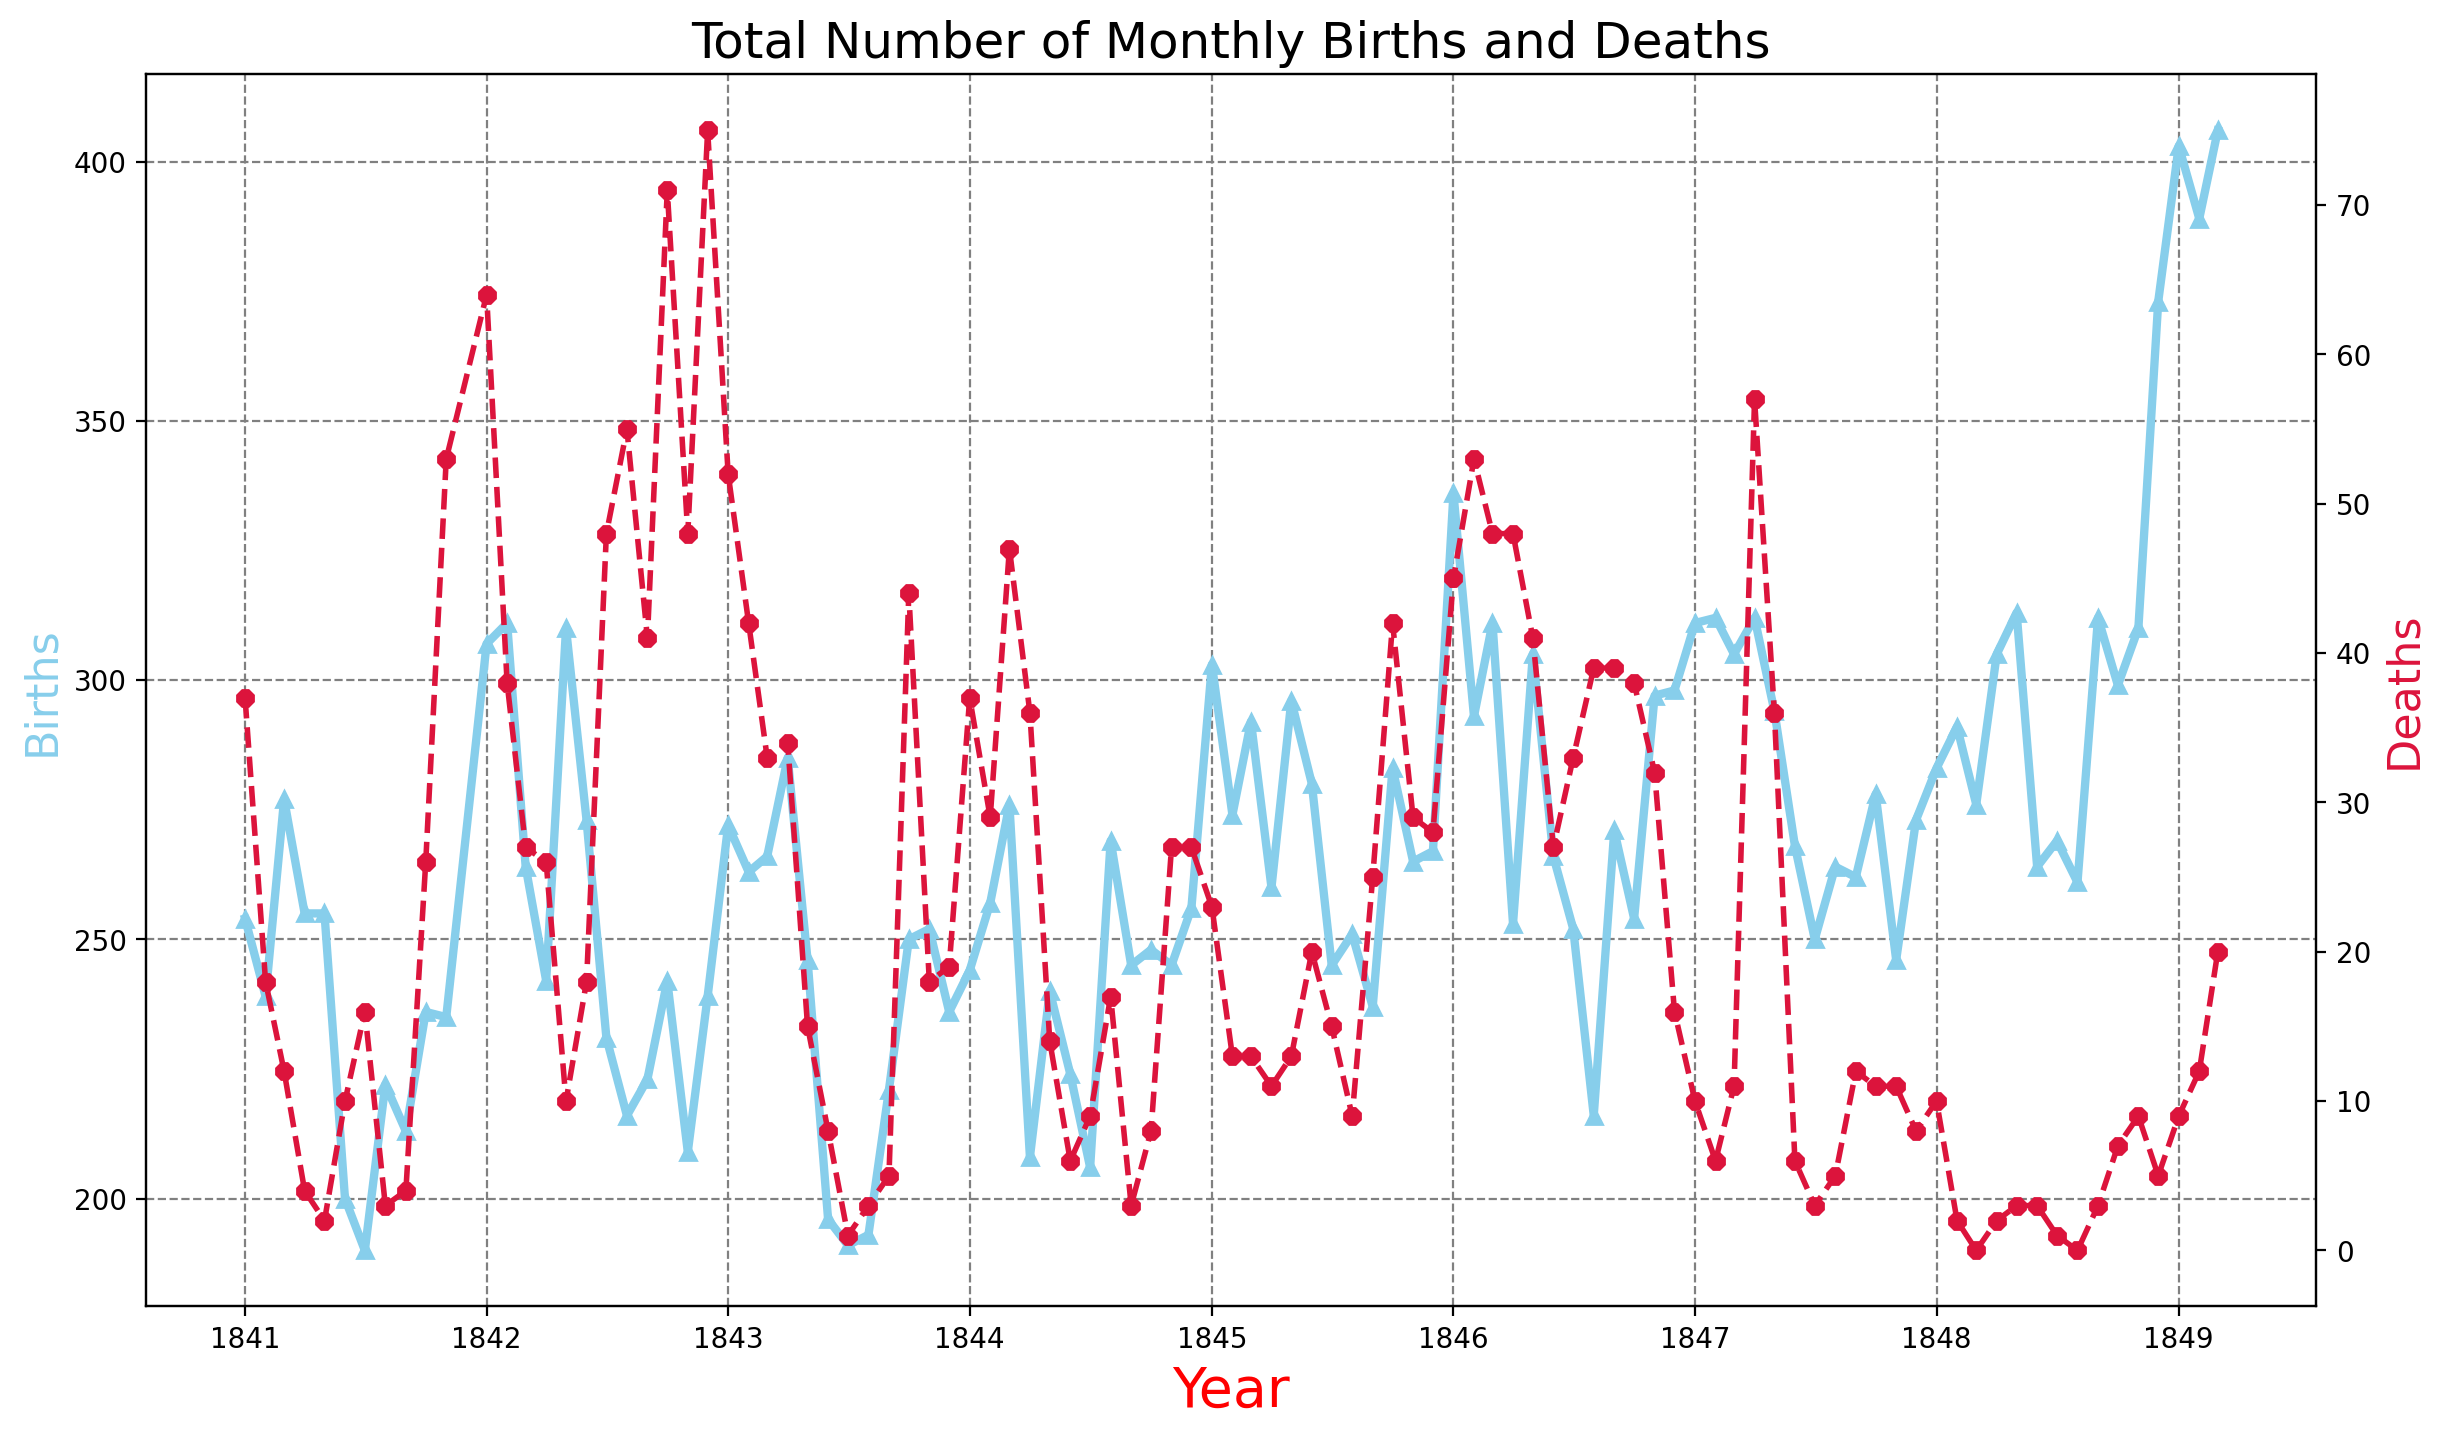

In [34]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.grid(color='grey', linestyle='--')
 
ax1.plot(df_monthly.date, 
         df_monthly.births, 
         color='skyblue', 
         linewidth=3,
        marker='^')
 
ax2.plot(df_monthly.date, 
         df_monthly.deaths, 
         color='crimson', 
         linewidth=2, 
         linestyle='--', 
        marker='8')
 

ax1.set_ylabel("Births", color='skyblue', fontsize=16)   
ax1.set_xlabel("Year", color='red', fontsize=20)
ax2.set_ylabel("Deaths",color="crimson", fontsize=16)
    
plt.show()

# The Yearly Data Split by Clinic

Now let's look at the annual data instead. 

 Use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital. 
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time? 
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [35]:
clinic_one_births = df_yearly[(df_yearly.clinic == 'clinic 1') ]['births']

In [36]:
clinic_one_births_dates = df_yearly[(df_yearly.clinic == 'clinic 1') ]['year']

In [37]:
clinic_one_deaths = df_yearly[(df_yearly.clinic == 'clinic 1') ]['deaths']

In [38]:
clinic_two_births = df_yearly[(df_yearly.clinic == 'clinic 2') ]['births']

In [39]:
clinic_two_births_dates = df_yearly[(df_yearly.clinic == 'clinic 2') ]['year']

In [40]:
clinic_two_deaths = df_yearly[(df_yearly.clinic == 'clinic 2') ]['deaths']

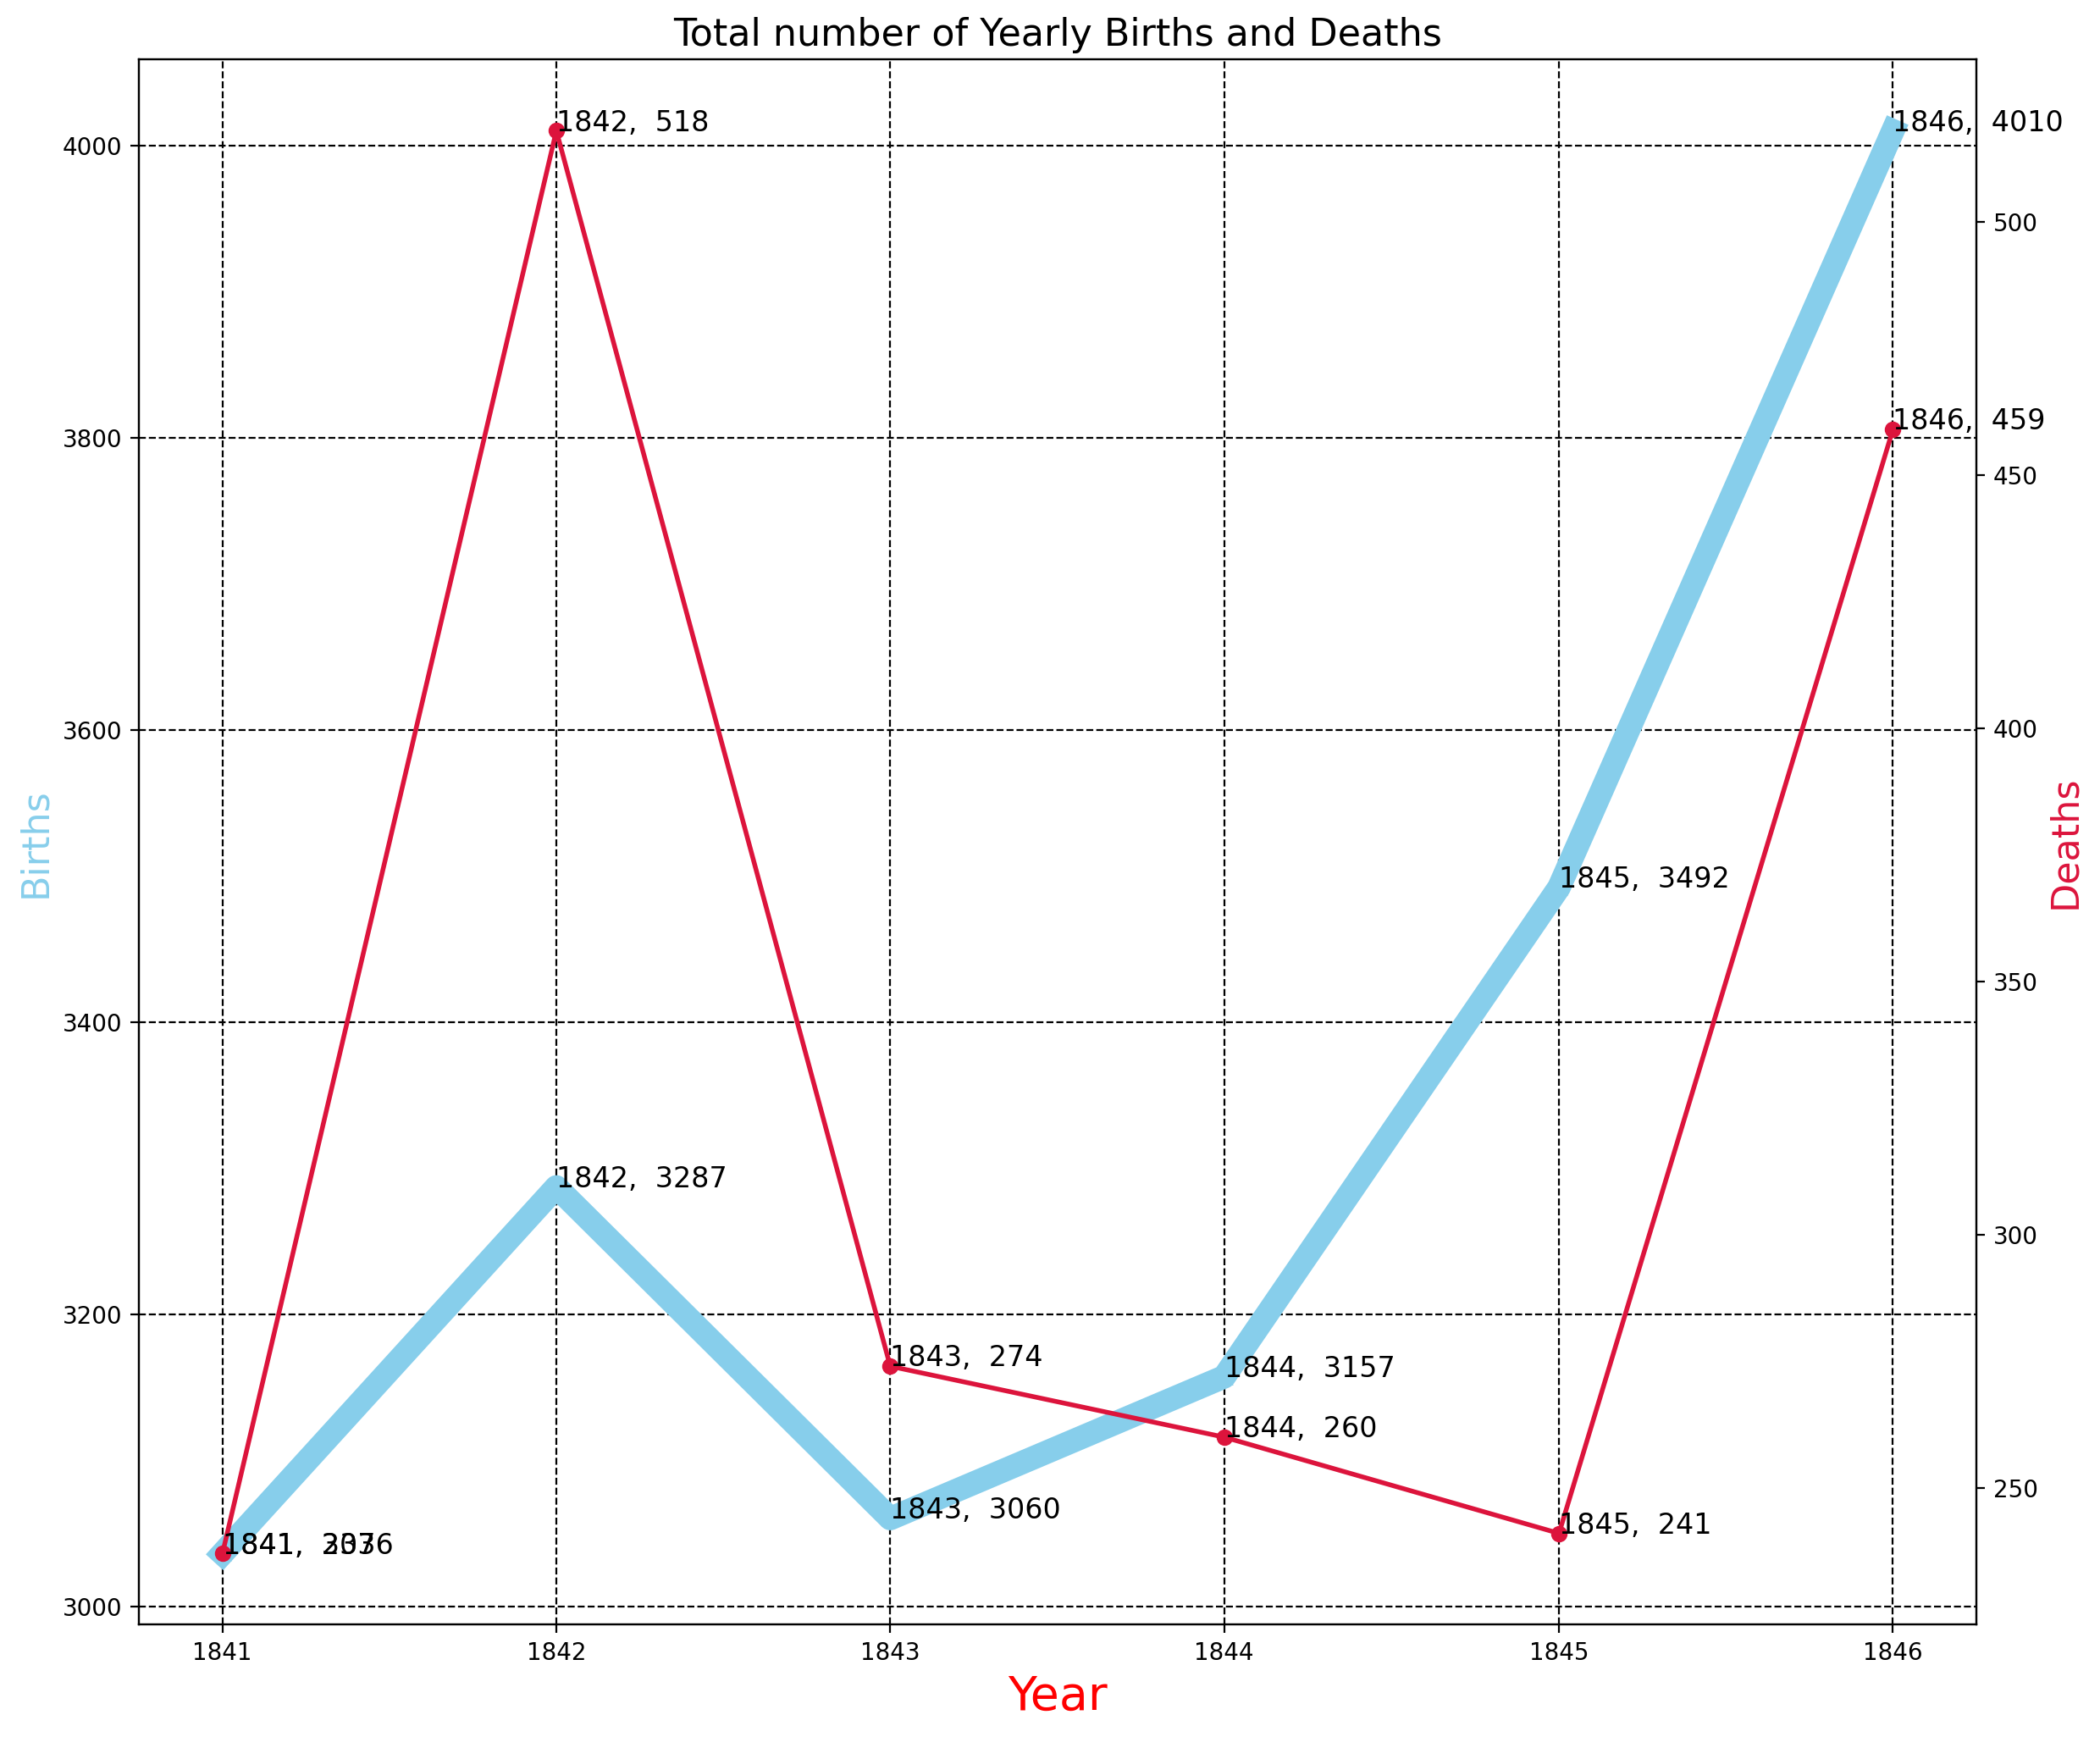

In [41]:
plt.figure(figsize=(14,12), dpi=200)
plt.title("Total number of Yearly Births and Deaths", fontsize=16)



ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color='black', linestyle='--')

ax1.plot(clinic_one_births_dates,
        clinic_one_births, 
        color='skyblue',
        linewidth=10,         
         marker='^')

ax2.plot(clinic_one_births_dates,
        clinic_one_deaths,
        color='crimson',
         linewidth=2,         
        marker='o')

ax1.set_ylabel("Births", color='skyblue', fontsize=16)   
ax1.set_xlabel("Year", color='red', fontsize=20)
ax2.set_ylabel("Deaths",color="crimson", fontsize=16)


for xy in zip(clinic_one_births_dates, clinic_one_births): 
#     print(xy[0].strftime("%Y") )
    ax1.annotate(f"{xy[0].strftime('%Y') },  {xy[1]} ", xy=xy, color='black', fontsize=12)

for xy in zip(clinic_one_births_dates, clinic_one_deaths):
    ax2.annotate(f"{xy[0].strftime('%Y') },  {xy[1]} ", xy=xy, color='black', fontsize=12)
    
    
plt.show()

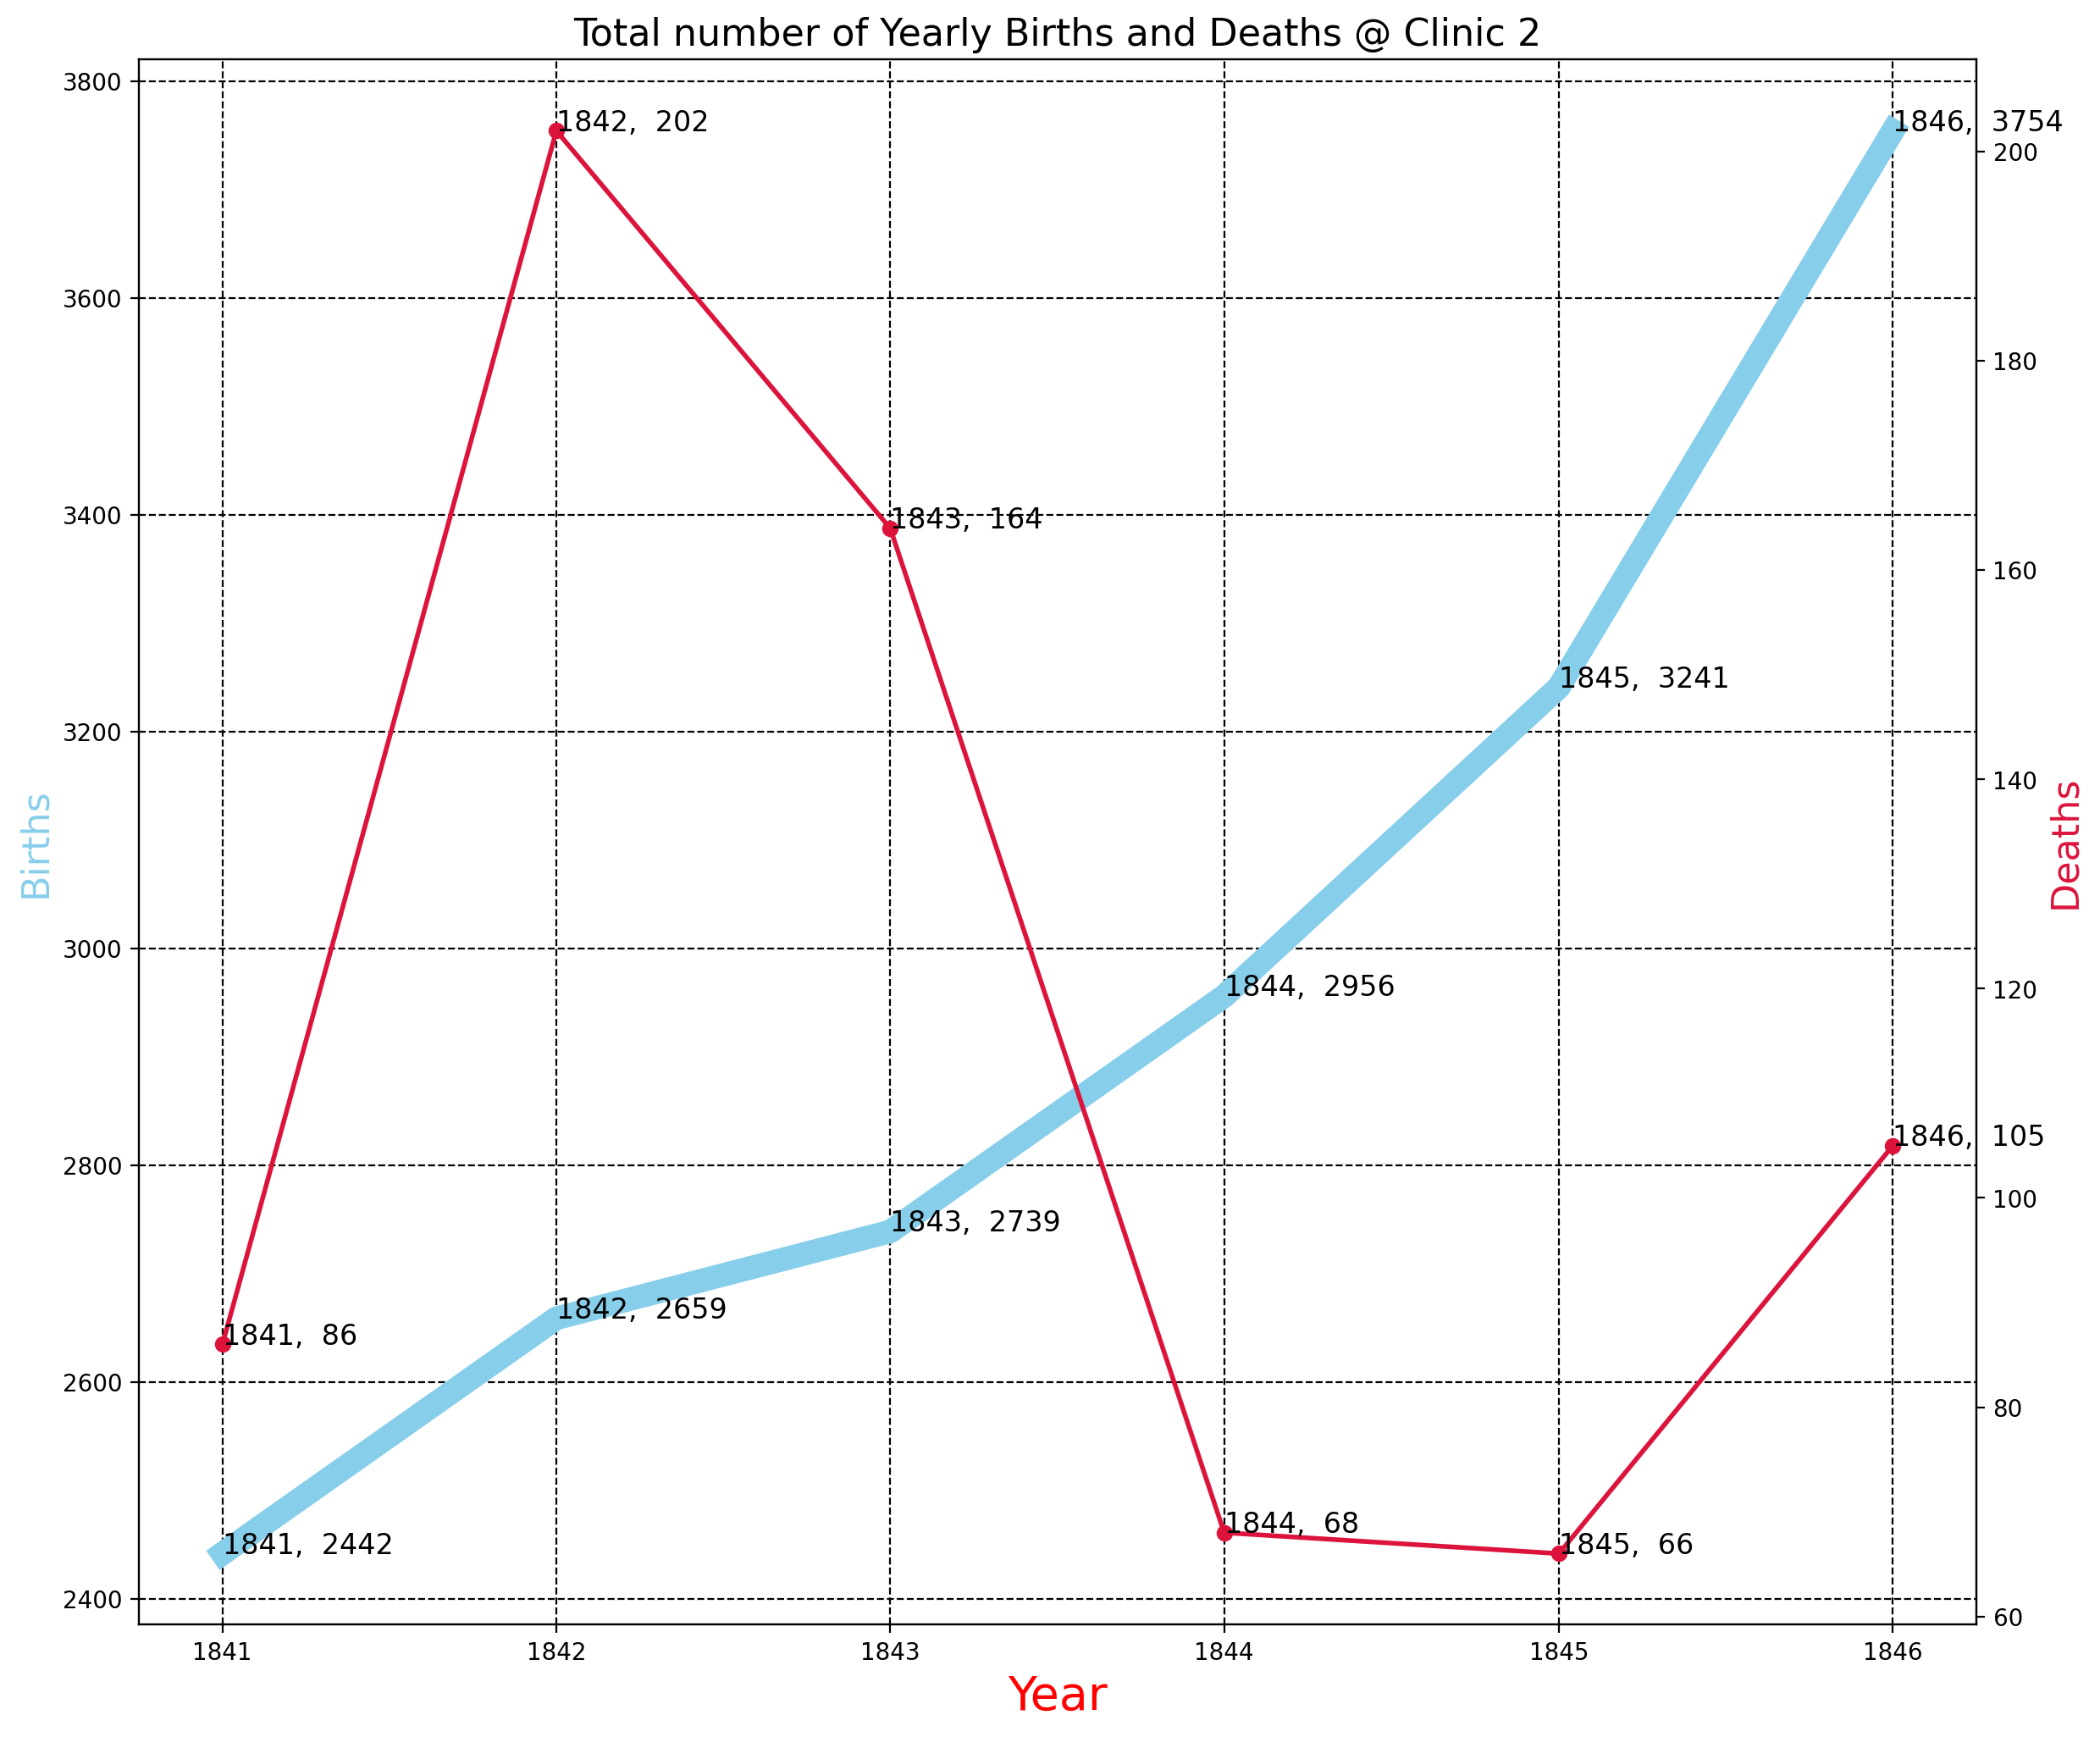

In [42]:
plt.figure(figsize=(14,12), dpi=200)
plt.title("Total number of Yearly Births and Deaths @ Clinic 2", fontsize=16)



ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color='black', linestyle='--')

ax1.plot(clinic_two_births_dates,
        clinic_two_births, 
        color='skyblue',
        linewidth=10,         
         marker='^')

ax2.plot(clinic_two_births_dates,
        clinic_two_deaths,
        color='crimson',
         linewidth=2,         
        marker='o')

ax1.set_ylabel("Births", color='skyblue', fontsize=16)   
ax1.set_xlabel("Year", color='red', fontsize=20)
ax2.set_ylabel("Deaths",color="crimson", fontsize=16)


for xy in zip(clinic_two_births_dates, clinic_two_births): 
#     print(xy[0].strftime("%Y") )
    ax1.annotate(f"{xy[0].strftime('%Y') },  {xy[1]} ", xy=xy, color='black', fontsize=12)

for xy in zip(clinic_two_births_dates, clinic_two_deaths):
    ax2.annotate(f"{xy[0].strftime('%Y') },  {xy[1]} ", xy=xy, color='black', fontsize=12)
    
    
plt.show()

### Calculate the Proportion of Deaths at Each Clinic

 Calculate the proportion of maternal deaths per clinic. That way we can compare like with like. 
* Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths". 
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [43]:
df_yearly

year  births  deaths    clinic
0  1841-01-01    3036     237  clinic 1
1  1842-01-01    3287     518  clinic 1
2  1843-01-01    3060     274  clinic 1
3  1844-01-01    3157     260  clinic 1
4  1845-01-01    3492     241  clinic 1
5  1846-01-01    4010     459  clinic 1
6  1841-01-01    2442      86  clinic 2
7  1842-01-01    2659     202  clinic 2
8  1843-01-01    2739     164  clinic 2
9  1844-01-01    2956      68  clinic 2
10 1845-01-01    3241      66  clinic 2
11 1846-01-01    3754     105  clinic 2

In [44]:
percentage_deaths_clinic_one = (1 - (df_yearly[df_yearly.clinic == 'clinic 1']['births'] - df_yearly[df_yearly.clinic == 'clinic 1']['deaths'])/df_yearly[df_yearly.clinic == 'clinic 1']['births'])

In [45]:
percentage_deaths_clinic_two = (1 - (df_yearly[df_yearly.clinic == 'clinic 2']['births'] - df_yearly[df_yearly.clinic == 'clinic 2']['deaths'])/df_yearly[df_yearly.clinic == 'clinic 2']['births'])


In [46]:
list_of_data = percentage_deaths_clinic_one.append(percentage_deaths_clinic_two)

C:\Users\ashis\AppData\Local\Temp\ipykernel_25560\2230891934.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  list_of_data = percentage_deaths_clinic_one.append(percentage_deaths_clinic_two)


In [47]:
list_of_data

0    0.08
1    0.16
2    0.09
3    0.08
4    0.07
5    0.11
6    0.04
7    0.08
8    0.06
9    0.02
10   0.02
11   0.03
dtype: float64

In [48]:

df_yearly['pct_deaths'] = list_of_data

In [53]:
df_yearly

year  births  deaths    clinic  pct_deaths
0  1841-01-01    3036     237  clinic 1        0.08
1  1842-01-01    3287     518  clinic 1        0.16
2  1843-01-01    3060     274  clinic 1        0.09
3  1844-01-01    3157     260  clinic 1        0.08
4  1845-01-01    3492     241  clinic 1        0.07
5  1846-01-01    4010     459  clinic 1        0.11
6  1841-01-01    2442      86  clinic 2        0.04
7  1842-01-01    2659     202  clinic 2        0.08
8  1843-01-01    2739     164  clinic 2        0.06
9  1844-01-01    2956      68  clinic 2        0.02
10 1845-01-01    3241      66  clinic 2        0.02
11 1846-01-01    3754     105  clinic 2        0.03

### Plotting the Proportion of Yearly Deaths by Clinic

[]

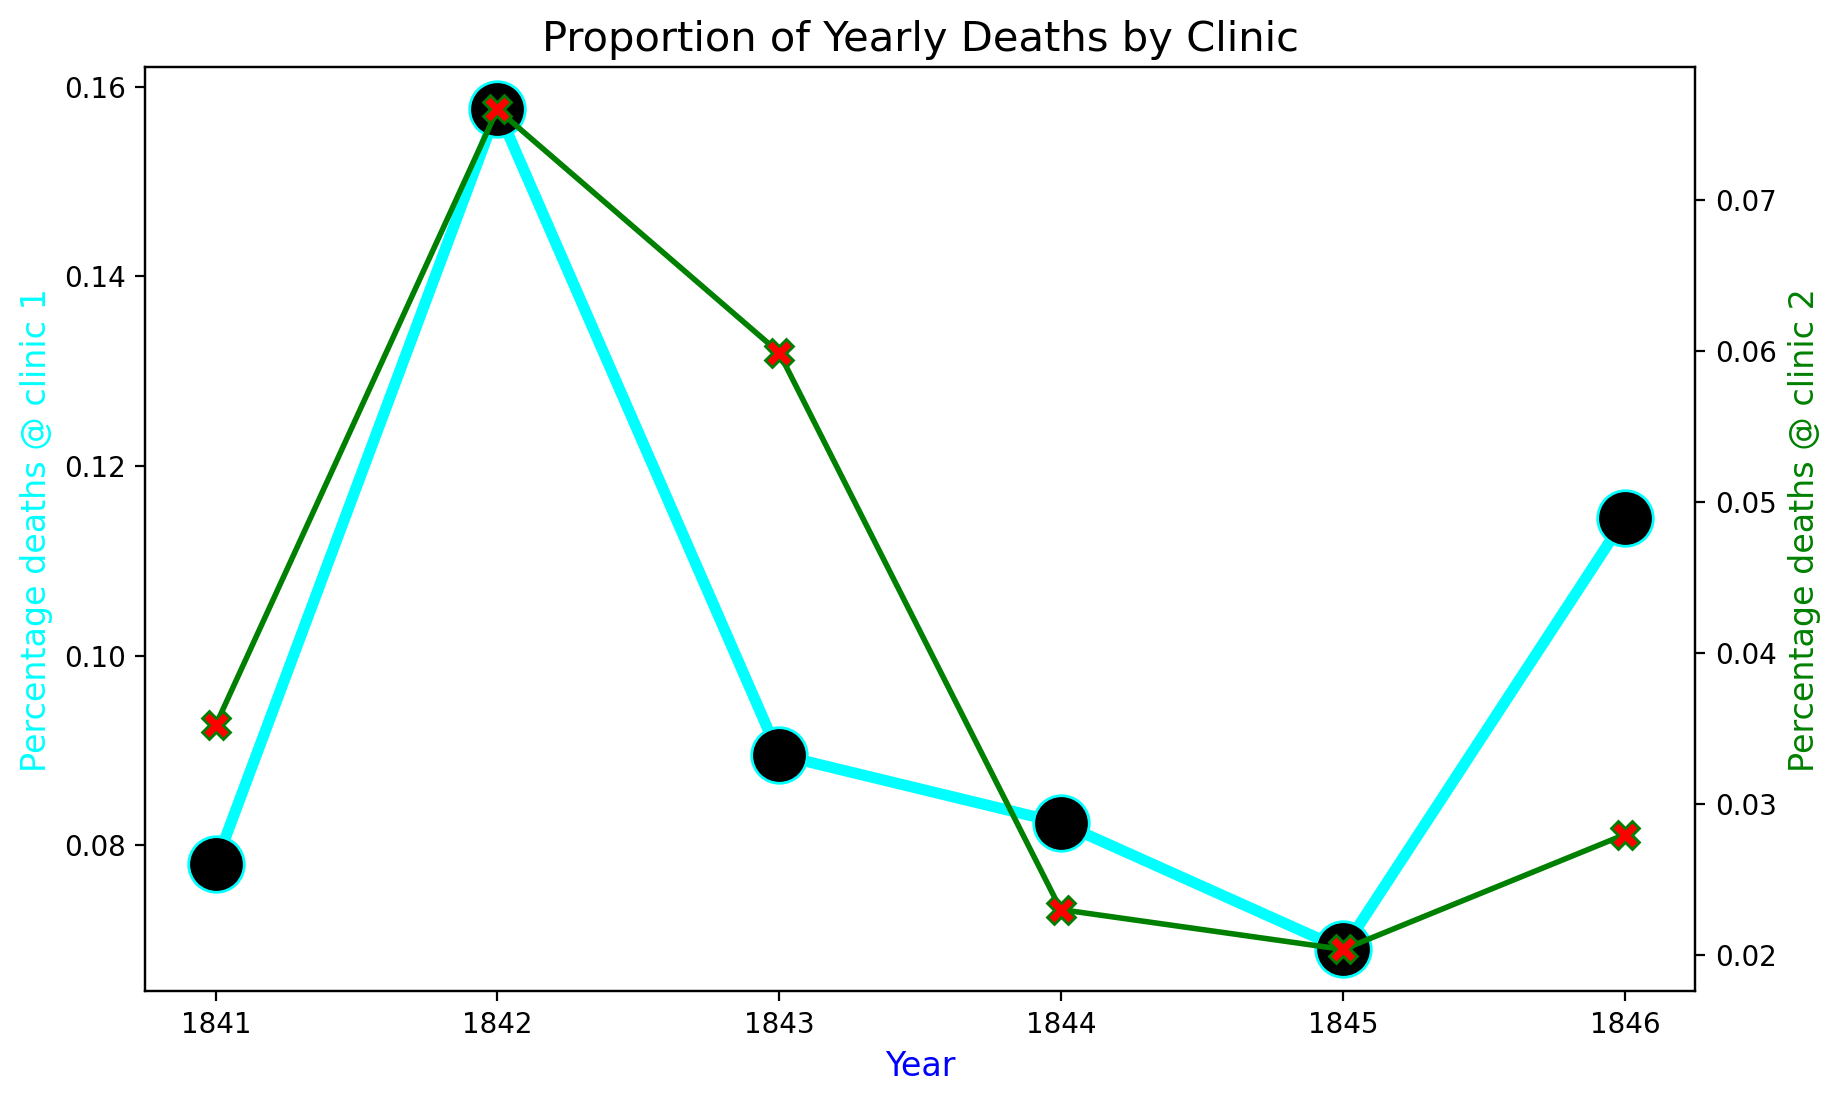

In [69]:
plt.figure(figsize=(10,6), dpi=200)
plt.title("Proportion of Yearly Deaths by Clinic",
         fontsize=15)

ax1 = plt.gca()
ax2 = ax1.twinx() # both plots share the same x valuees

ax1.plot(clinic_one_births_dates,
    df_yearly['pct_deaths'][df_yearly.clinic == 'clinic 1'],
         color='cyan',
        linewidth=4,
        marker='o',
        ms=20,
        mfc='black')

ax2.plot(clinic_one_births_dates,
        df_yearly['pct_deaths'][df_yearly.clinic == 'clinic 2'],
        color='green',
        linewidth=2,
        marker='X',
        ms=10,
        mfc='red')

ax1.set_ylabel("Percentage deaths @ clinic 1",
              fontsize=12,
              color='cyan')
ax1.set_xlabel("Year",
              fontsize=12,
              color='blue')
ax2.set_ylabel("Percentage deaths @ clinic 2",
              fontsize=12,
              color='green')


plt.plot()

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [70]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row. 
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [78]:
df_monthly['pct_deaths'] = df_monthly.births / df_monthly.deaths

In [80]:
df_monthly_pre_handwashing =  df_monthly[df_monthly.date < handwashing_start]

In [81]:
df_monthly_post_handwashing = df_monthly[df_monthly.date >= handwashing_start]


In [90]:
# average death rate prior to june 1947
df_monthly_pre_handwashing.pct_deaths

0      6.86
1     13.28
2     23.08
3     63.75
4    127.50
      ...  
71    31.10
72    52.00
73    27.73
74     5.47
75     8.17
Name: pct_deaths, Length: 76, dtype: float64

In [89]:
df_monthly_post_handwashing.pct_deaths

76    44.67
77    83.33
78    52.80
79    21.83
80    25.27
81    22.36
82    34.12
83    28.30
84   145.50
85      inf
86   152.50
87   104.33
88    88.00
89   269.00
90      inf
91   104.00
92    42.71
93    34.44
94    74.60
95    44.78
96    32.42
97    20.30
Name: pct_deaths, dtype: float64

### Calculate a Rolling Average of the Death Rate

 Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.


You'll need to set the dates as the index in order to avoid the date column being dropped during the calculation.

In [91]:
roll_df = df_monthly_pre_handwashing.set_index('date')
roll_df = roll_df.rolling(window=6).mean()

### Highlighting Subsections of a Line Chart

**Challenge**: Copy-paste and then modify the Matplotlib chart from before to plot the monthly death rates (instead of the total number of births and deaths). The chart should look something like this:

<img src=https://i.imgur.com/X6TQe0R.png width=500>

* Add 3 seperate lines to the plot: the death rate before handwashing, after handwashing, and the 6-month moving average before handwashing.
* Show the monthly death rate before handwashing as a thin dashed black line. 
* Show the moving average as a thicker, crimon line.
* Show the rate after handwashing as a skyblue line with round markers. 
* Look at the [code snippet in the documentation to see how you can add a legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) to the chart.

In [95]:
# Create locators for ticks on the time axis in this case the x-axis

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

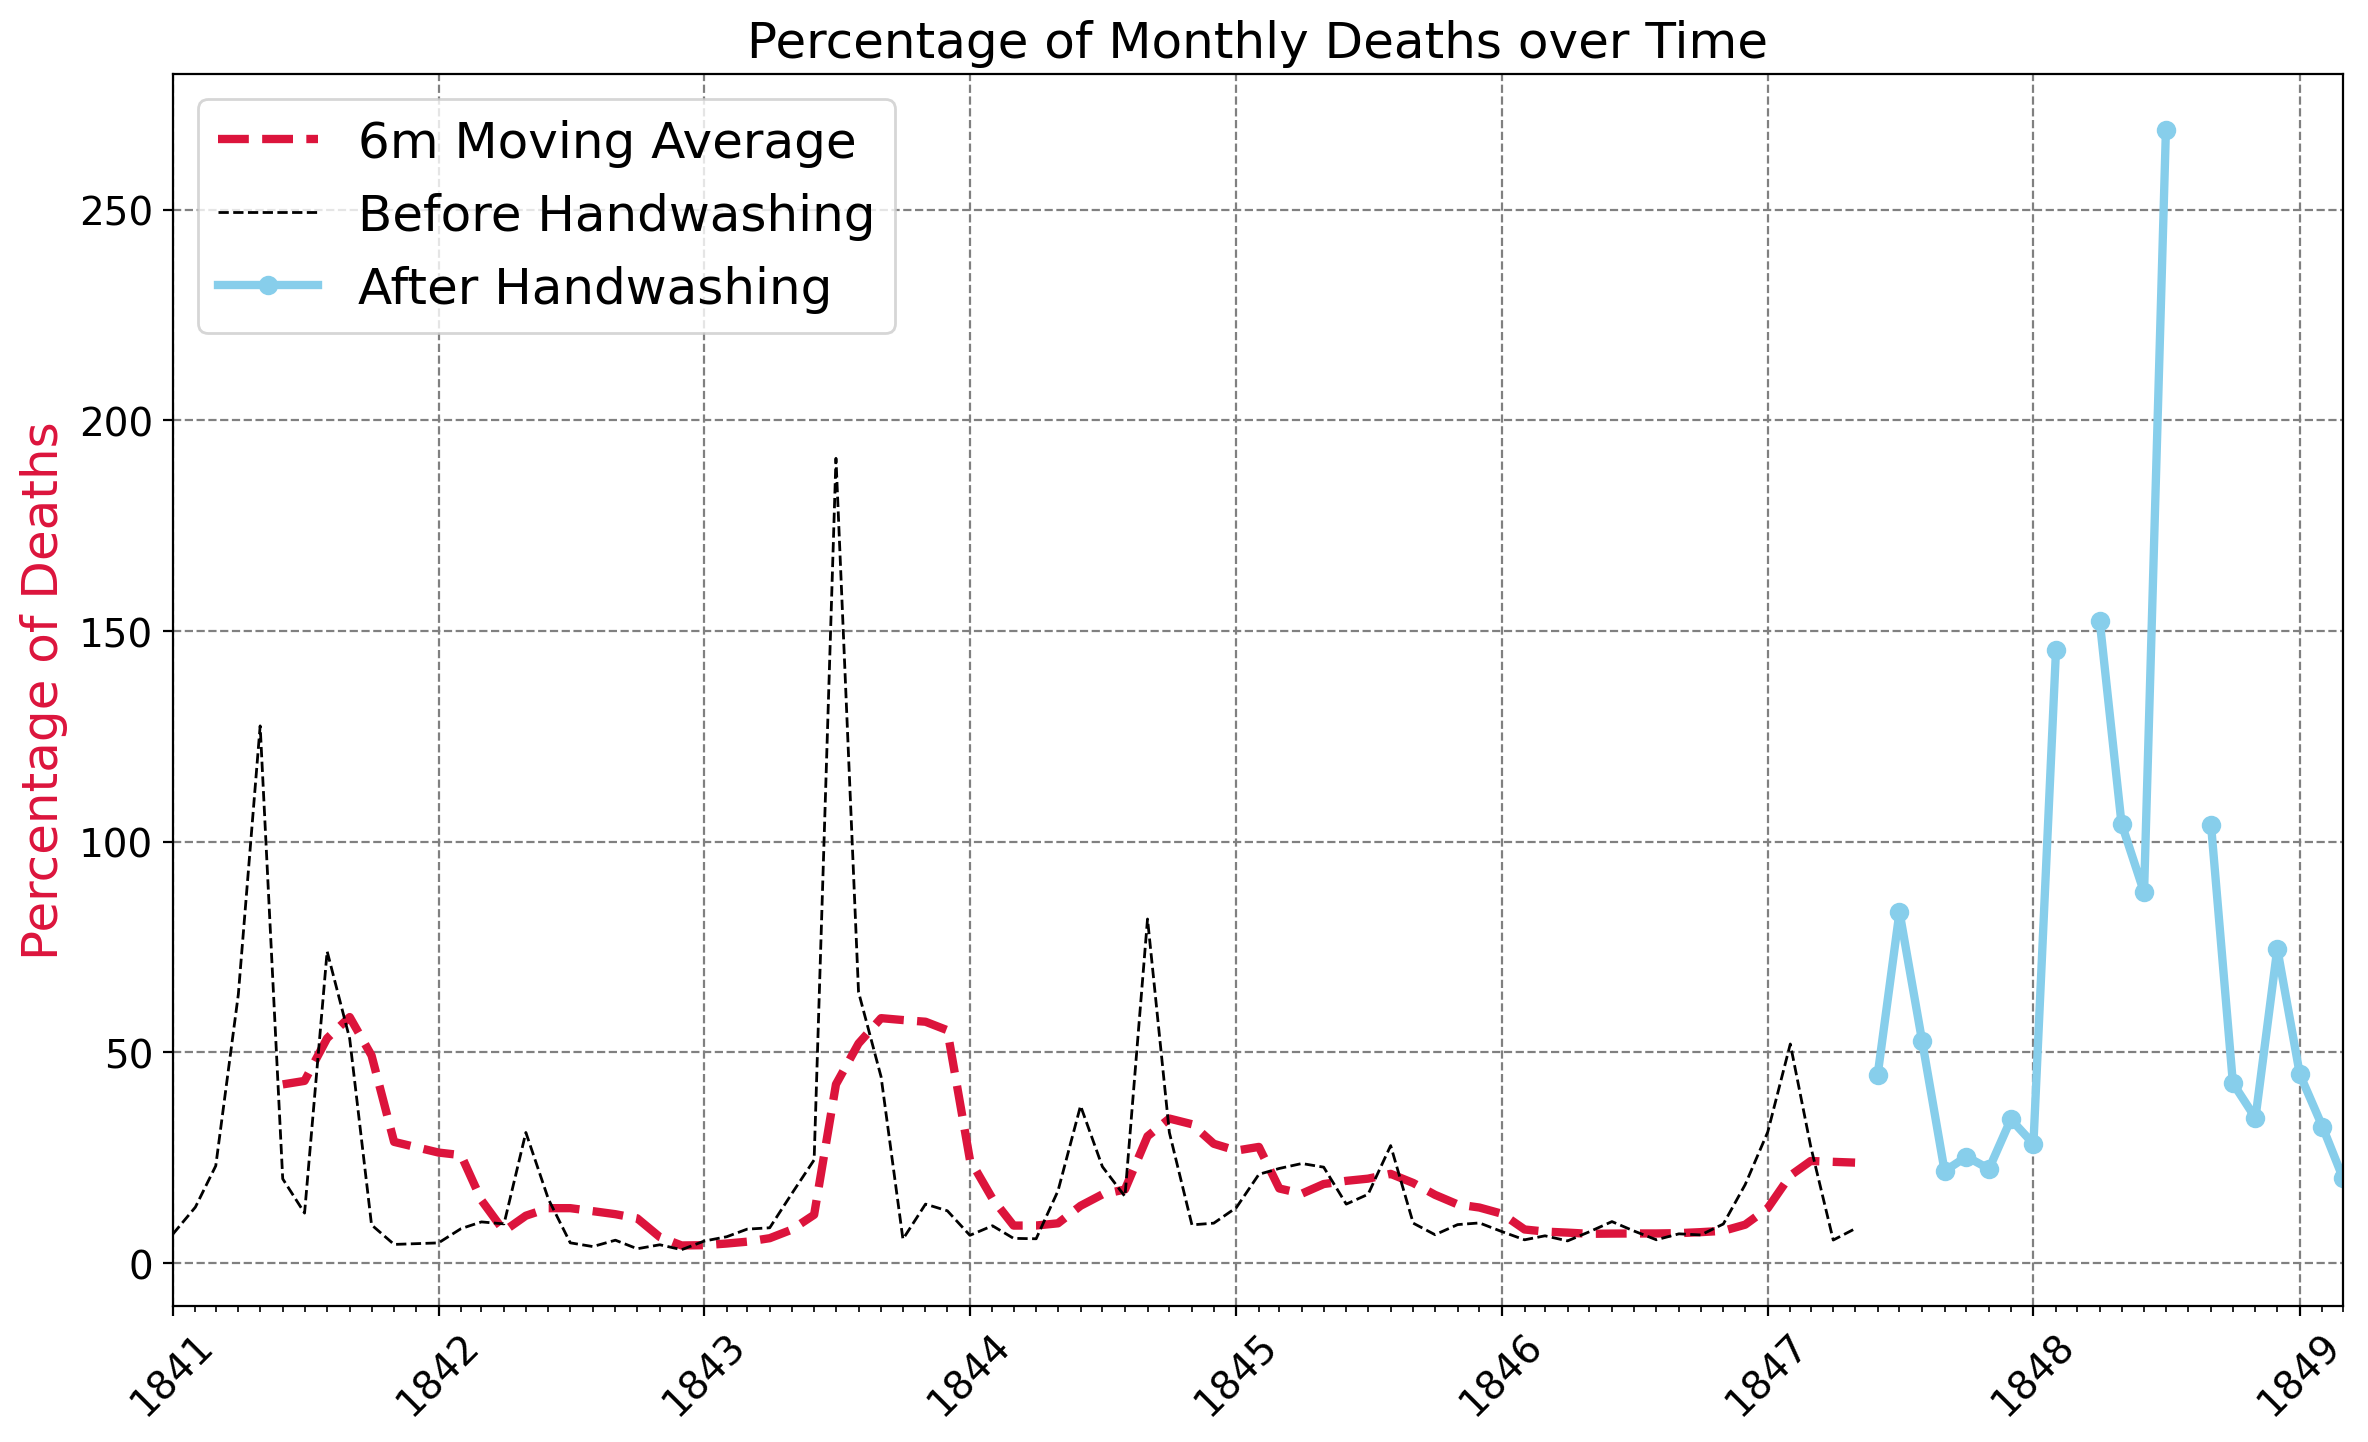

In [96]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)
 
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)


ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
 
plt.grid(color='grey', linestyle='--')
 
ma_line, = plt.plot(roll_df.index, 
                    roll_df.pct_deaths, 
                    color='crimson', 
                    linewidth=3, 
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(df_monthly_pre_handwashing.date, 
                    df_monthly_pre_handwashing.pct_deaths,
                    color='black', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Before Handwashing')
aw_line, = plt.plot(df_monthly_post_handwashing.date, 
                    df_monthly_post_handwashing.pct_deaths, 
                    color='skyblue', 
                    linewidth=3, 
                    marker='o',
                    label='After Handwashing')
 
plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)
 
plt.show()



### Statistics - Calculate the Difference in the Average Monthly Death Rate

* What was the average percentage of monthly deaths before handwashing? 
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier? 
* How many times lower are the chances of dying after handwashing compared to before?

In [97]:
df_monthly_pre_handwashing.describe()

births  deaths  pct_deaths
count   76.00   76.00       76.00
mean   257.51   27.11       20.79
std     34.28   17.94       28.86
min    190.00    1.00        3.19
25%    236.75   11.75        6.66
50%    254.50   26.50        9.51
75%    280.75   39.50       22.80
max    336.00   75.00      191.00

In [98]:
df_monthly_post_handwashing.describe()

births  deaths  pct_deaths
count   22.00   22.00       22.00
mean   299.77    6.45         inf
std     49.11    4.97         NaN
min    246.00    0.00       20.30
25%    265.00    3.00       32.84
50%    280.50    5.50       48.79
75%    311.50    9.75      104.25
max    406.00   20.00         inf

In [100]:
df_monthly['washing_hands'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')

In [102]:
df_monthly

date  births  deaths  pct_deaths washing_hands
0  1841-01-01     254      37        6.86            No
1  1841-02-01     239      18       13.28            No
2  1841-03-01     277      12       23.08            No
3  1841-04-01     255       4       63.75            No
4  1841-05-01     255       2      127.50            No
..        ...     ...     ...         ...           ...
93 1848-11-01     310       9       34.44           Yes
94 1848-12-01     373       5       74.60           Yes
95 1849-01-01     403       9       44.78           Yes
96 1849-02-01     389      12       32.42           Yes
97 1849-03-01     406      20       20.30           Yes

[98 rows x 5 columns]

In [103]:
box = px.box(df_monthly, 
             x='washing_hands', 
             y='pct_deaths',
             color='washing_hands',
             title='How Have the Stats Changed with Handwashing?')
 
box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)
 
box.show()

### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing. 
* Then use plotly to create box plot of the data before and after handwashing. 
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?



In [104]:
hist = px.histogram(df_monthly, 
                   x='pct_deaths', 
                   color='washing_hands',
                   nbins=30,
                   opacity=0.6,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)
 
hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)
 

### Use Histograms to Visualise the Monthly Distribution of Outcomes

**Challenge**: Create a [plotly histogram](https://plotly.com/python/histograms/) to show the monthly percentage of deaths. 

* Use docs to check out the available parameters. Use the [`color` parameter](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) to display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing. Change `histnorm` to `percent` to make the time periods comparable. 
* Make the histograms slighlty transparent
* Experiment with the number of bins on the histogram. Which number work well in communicating the range of outcomes?
* Just for fun, display your box plot on the top of the histogram using the `marginal` parameter. 

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

**Challenge**: Use [Seaborn's `.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after. 

* Use the `shade` parameter to give your two distributions different colours. 
* What weakness in the chart do you see when you just use the default parameters?
* Use the `clip` parameter to address the problem. 


C:\Users\ashis\AppData\Local\Temp\ipykernel_25560\4054260939.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\ashis\AppData\Local\Temp\ipykernel_25560\4054260939.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




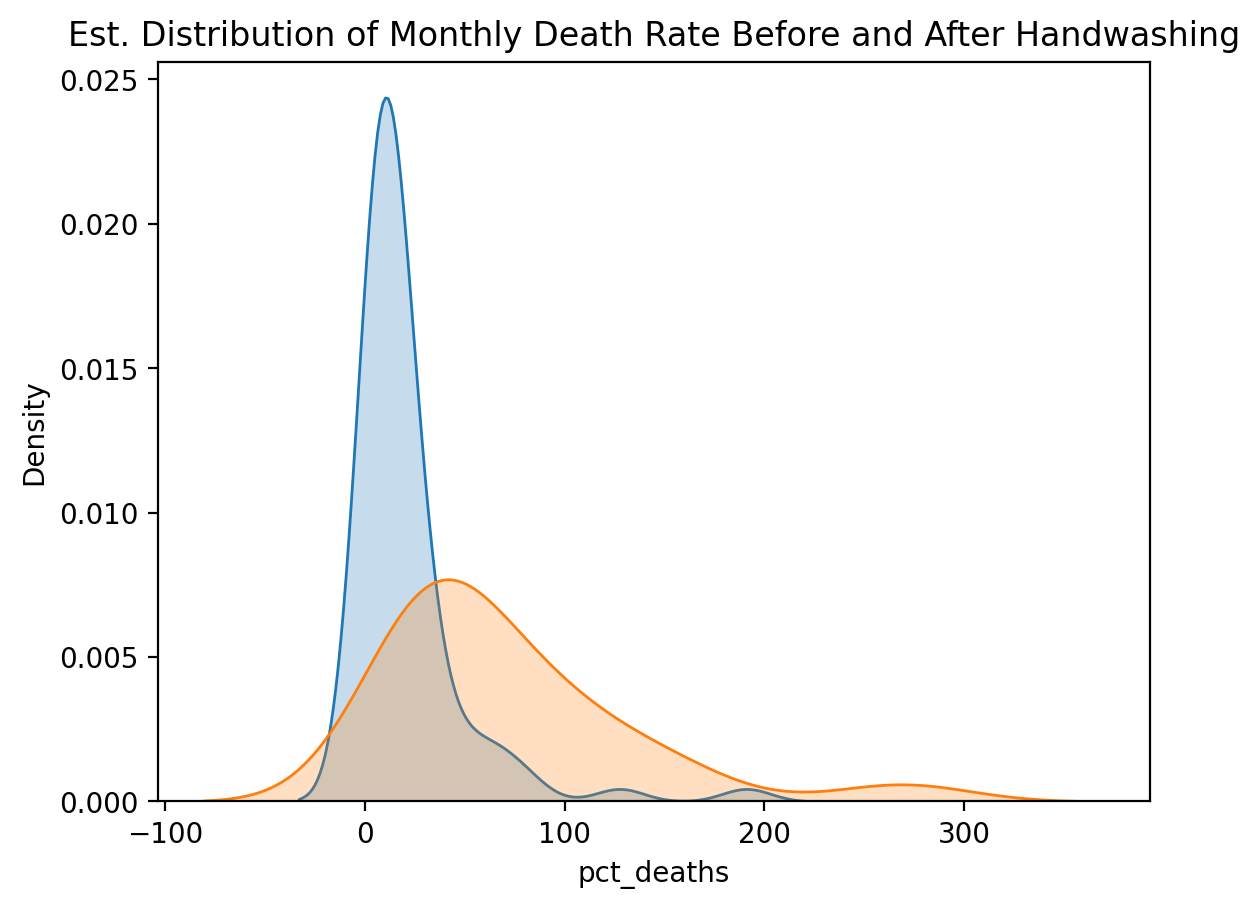

In [106]:
plt.figure(dpi=200)
# By default the distribution estimate includes a negative death rate!
sns.kdeplot(df_monthly_pre_handwashing.pct_deaths, shade=True)
sns.kdeplot(df_monthly_post_handwashing.pct_deaths, shade=True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.show()

### Use a T-Test to Show Statistical Significance

**Challenge**: Use a t-test to determine if the differences in the means are statistically significant or purely due to chance. 

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate. 

* Import `stats` from scipy
* Use the [`.ttest_ind()` function](https://docs.scipy.org/]doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-statistic and the p-value
* Is the difference in the average proportion of monthly deaths statistically significant at the 99% level? 



In [113]:
df_monthly['pct_deaths'] = df_monthly.deaths/df_monthly.births


In [114]:
before_washing = df_monthly[df_monthly.date < handwashing_start]
after_washing = df_monthly[df_monthly.date >= handwashing_start]

In [115]:
t_stat, p_value = stats.ttest_ind(a=before_washing.pct_deaths, 
                                  b=after_washing.pct_deaths)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-palue is 0.0000002985
t-statstic is 5.512


What do you conclude from your analysis, Doctor? 😊

<img src=https://i.imgur.com/rvjNVzQ.gif>